## holdout

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

#
def replace(df):
    df = df.replace(['Male', 'Female'], [1, 0])
    return df
    
df = pd.read_csv('./Social_Network_Ads.csv')
res = replace(df)

X = res[['Gender', 'Age', 'EstimatedSalary']]
y = res['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = GaussianNB()
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print('예측 결과 : ', predicted)
print('예측 정확도 : ', accuracy_score(y_test, predicted))

예측 결과 :  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1]
예측 정확도 :  0.8916666666666667


## 10-fold validation

In [38]:
k = 10
cv = KFold(k)
accuracy_history = []

for i, (train_data_row, test_data_row) in enumerate(cv.split(res)):
    df_train = res.iloc[train_data_row]
    df_test = res.iloc[test_data_row]
    
    X_train = df_train[['Gender', 'Age', 'EstimatedSalary']]
    y_train = df_train['Purchased']
    X_test = df_test[['Gender', 'Age', 'EstimatedSalary']]
    y_test = df_test['Purchased']
    
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    predicted = model.predict(X_test)
    accuracy_history.append(accuracy_score(y_test, predicted))
    
accuracy_mean = np.mean(accuracy_history)
accuracy_var = np.var(accuracy_history) 
print('평균 정확도 :', accuracy_mean)
print('분산 :', accuracy_var)

평균 정확도 : 0.8550000000000001
분산 : 0.009850000000000003


## roc curve, confusion matrix

auc_score :  0.9589379438098178


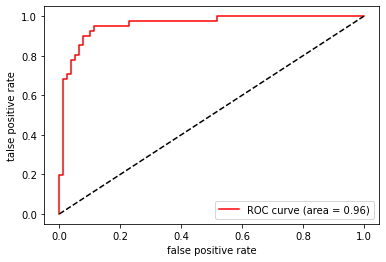

In [43]:
pred_prob = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_prob)
roc_auc = roc_auc_score(y_test, pred_prob)

print("auc_score : ",roc_auc)

plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve (area = %0.2f)' %roc_auc, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('false positive rate')
plt.ylabel('talse positive rate')
plt.legend()

In [44]:
matrix = confusion_matrix(predicted, y_test)
TP = matrix[0][0]
FN = matrix[0][1]
FP = matrix[1][0]
TN = matrix[1][1]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("precision: %.2f" %precision)
print("recall: %.2f" %recall)
print("sensitivity: %.2f" %sensitivity)
print("specificity: %.2f" %specificity)

precision: 0.94
recall: 0.90
sensitivity: 0.90
specificity: 0.87
